## Observations and Insights

Three Observations:
• Ramicane has the lowest STD-Dev & SEM hence that study has higher rate of accuracy while Ketapril’s higher STD-Dev & SEM value shows that data is too far spread out to get accurate results.
• Upon closer inspection, Capomulin has lower IQR than Ramicane showing that the outlier did not impact much of the data which makes Capomulin a better option than Ramicane.  Box plot visually shows tighter spread for Capomulin vs Ramicane.
• Correlation coefficient for Capomulin is .84 or 84% which means that there is a high linear relationship between weight and tumor volume.


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Study data files
mouse_data = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_results = pd.merge(study_results, mouse_data, how = "left", on="Mouse ID")

## Summary statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regiment

tumor_regimen = mouse_study_results.set_index('Drug Regimen').groupby(['Drug Regimen'])

tumor_mean = tumor_regimen["Tumor Volume (mm3)"].mean()
tumor_median = tumor_regimen["Tumor Volume (mm3)"].median()
tumor_variance = tumor_regimen["Tumor Volume (mm3)"].var()
tumor_stddev = tumor_regimen["Tumor Volume (mm3)"].std()
tumor_SEM = tumor_regimen["Tumor Volume (mm3)"].sem()

tumor_summary = pd.DataFrame({"Mean" : tumor_mean, 
                              "Median" : tumor_median,
                              "Variance" : tumor_variance,
                              "Std-Dev" : tumor_stddev,
                              "SEM" : tumor_SEM
                             })
tumor_summary

,Mean,Median,Variance,Std-Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

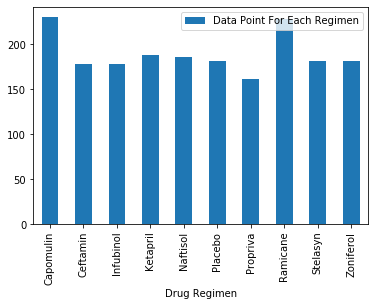

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_data = mouse_study_results.groupby(['Drug Regimen'])
regimen_count = regimen_data["Drug Regimen"].count()
df = pd.DataFrame({"Data Point For Each Regimen" : regimen_count})
df.plot.bar()

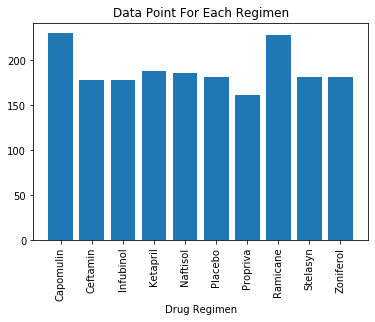

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#Get Labels for x axis
regimen_names = mouse_study_results["Drug Regimen"].unique()
regimen_names.sort()

#get regimen treatment data
regimen_count = mouse_study_results.groupby(['Drug Regimen'])["Drug Regimen"].count()

#create bar chart
x_axis = np.arange(len(regimen_names))
plt.bar(x_axis, regimen_count, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_names, rotation="vertical")
plt.title('Data Point For Each Regimen')
plt.xlabel('Drug Regimen')
plt.show()


## Pie plots

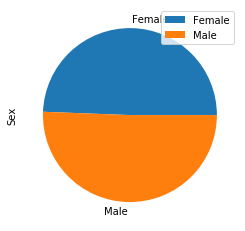

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = mouse_study_results["Sex"].unique()
data = mouse_study_results.groupby('Sex')["Sex"].count()
df = pd.DataFrame({"Sex" : data})
df.plot.pie(y='Sex')


([<matplotlib.patches.Wedge at 0x2dff953d3c8>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

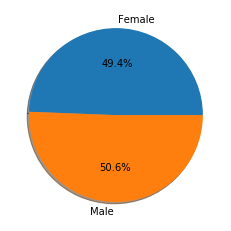

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_study_results["Sex"].unique()
plt.pie(data, labels=labels, shadow=True, autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and 
# quantitatively determine if there are any potential outliers. 

regimen_Capomulin = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == 'Capomulin']["Tumor Volume (mm3)"]
regimen_Ramicane = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == 'Ramicane']["Tumor Volume (mm3)"]
regimen_Infubinol = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == 'Infubinol']["Tumor Volume (mm3)"]
regimen_Ceftamin = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == 'Ceftamin']["Tumor Volume (mm3)"]

#regimen_Capomulin
Capomulin = regimen_Capomulin.quantile([.25, .5, .75])
Capomulin_lq = Capomulin[0.25]
Capomulin_uq = Capomulin[0.75]
Capomulin_iqr = Capomulin_uq - Capomulin_lq
Capomulin_lower_bound = Capomulin_lq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_uq + (1.5*Capomulin_iqr)

#regimen_Ramicanen
Ramicane = regimen_Ramicane.quantile([.25, .5, .75])
Ramicane_lq = Ramicane[0.25]
Ramicane_uq = Ramicane[0.75]
Ramicane_iqr = Ramicane_uq - Ramicane_lq
Ramicane_lower_bound = Ramicane_lq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_uq + (1.5*Ramicane_iqr)

#regimen_Infubinol
Infubinol = regimen_Infubinol.quantile([.25, .5, .75])
Infubinol_lq = Infubinol[0.25]
Infubinol_uq = Infubinol[0.75]
Infubinol_iqr = Infubinol_uq - Infubinol_lq
Infubinol_lower_bound = Infubinol_lq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_uq + (1.5*Infubinol_iqr)

#regimen_Ceftamin
Ceftamin = regimen_Ceftamin.quantile([.25, .5, .75])
Ceftamin_lq = Ceftamin[0.25]
Ceftamin_uq = Ceftamin[0.75]
Ceftamin_iqr = Ceftamin_uq - Ceftamin_lq
Ceftamin_lower_bound = Ceftamin_lq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_uq + (1.5*Ceftamin_iqr)

regimen_summary = pd.DataFrame({
   "Regimen Names" : ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],
    "Lower Quartile" : [Capomulin_lq,Ramicane_lq,Infubinol_lq,Ceftamin_lq],
    "Upper Quartile" : [Capomulin_uq,Ramicane_uq,Infubinol_uq,Ceftamin_uq ],
    "IQR": [Capomulin_iqr,Ramicane_iqr,Infubinol_iqr,Ceftamin_iqr],
    "Outlier Below" : [Capomulin_lower_bound,Ramicane_lower_bound,Infubinol_lower_bound,Ceftamin_lower_bound],
    "Outlier Above" : [Capomulin_upper_bound,Ramicane_upper_bound,Infubinol_upper_bound,Ceftamin_upper_bound]
})

regimen_summary['Lower Quartile'] = regimen_summary['Lower Quartile'].map("{:.2f}".format)
regimen_summary['Upper Quartile'] = regimen_summary['Upper Quartile'].map("{:.2f}".format)
regimen_summary['IQR'] = regimen_summary['IQR'].map("{:.2f}".format)
regimen_summary['Outlier Below'] = regimen_summary['Outlier Below'].map("{:.2f}".format)
regimen_summary['Outlier Above'] = regimen_summary['Outlier Above'].map("{:.2f}".format)

regimen_summary


,Regimen Names,Lower Quartile,Upper Quartile,IQR,Outlier Below,Outlier Above
0,Capomulin,37.69,45.00,7.31,26.71,55.97
1,Ramicane,36.67,45.00,8.33,24.19,57.49
2,Infubinol,47.31,57.31,10.00,32.31,72.32
3,Ceftamin,47.21,56.80,9.59,32.82,71.19


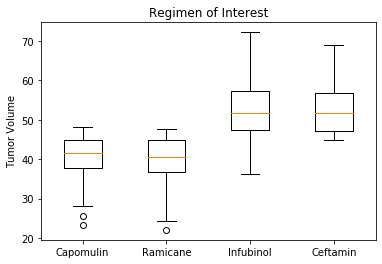

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [regimen_Capomulin, regimen_Ramicane, regimen_Infubinol, regimen_Ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_title('Regimen of Interest')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and scatter plots

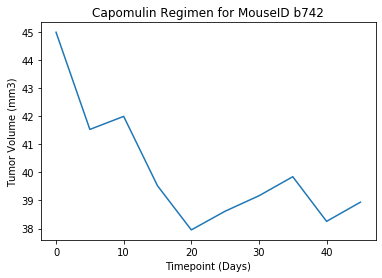

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Capomulin data
regimen_Capomulin = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == 'Capomulin']
#regimen_Capomulin.head()
#picked random Mouse ID: b742

graph_data = regimen_Capomulin.loc[regimen_Capomulin["Mouse ID"] == "b742",:]

x_axis = graph_data["Timepoint"]
y_axis = graph_data["Tumor Volume (mm3)"]
plt.title('Capomulin Regimen for MouseID b742')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis)
plt.show()

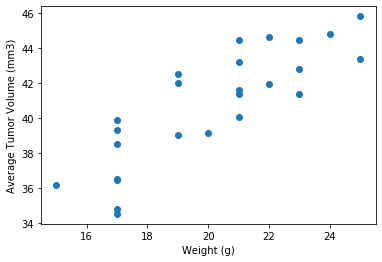

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Get average weight and average tumor volume for Capomulin regimen
Capomulin_mean = regimen_Capomulin.groupby(['Mouse ID']).mean()

# Plot the values
plt.scatter(Capomulin_mean['Weight (g)'], Capomulin_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation_coef = round(st.pearsonr(Capomulin_mean['Weight (g)'],Capomulin_mean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {correlation_coef}")


The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


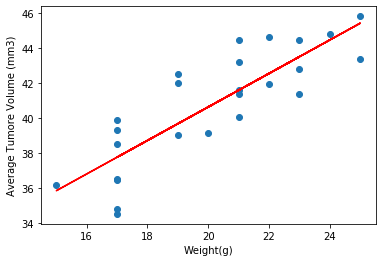

In [12]:
#scatter plot from previous problem
plt.scatter(Capomulin_mean['Weight (g)'],Capomulin_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

#linear regression model
regression_data=st.linregress(Capomulin_mean['Weight (g)'],Capomulin_mean['Tumor Volume (mm3)'])
slope = regression_data.slope
intercept = regression_data.intercept
regression_line = Capomulin_mean['Weight (g)'] * slope + intercept
plt.plot(Capomulin_mean['Weight (g)'], regression_line, color="red")
plt.show()